In [1]:
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")

Loading required package: NLP
Loading required package: RColorBrewer


In [2]:
library("RMySQL")

Loading required package: DBI


In [3]:
mydb = dbConnect(MySQL(), user='root', password='*****', dbname='oscar', host='localhost')

In [4]:
rs = dbSendQuery(mydb, "SELECT reviewContent FROM top10000_reviews_all where movieID='0468569'")

In [5]:
data = fetch(rs, n=-1)

In [6]:
fn <- "/Users/yy/Documents/Dongxf/liu/output.txt"
if (file.exists(fn)) file.remove(fn)
lapply(data, write, "/Users/yy/Documents/Dongxf/liu/output.txt", append=TRUE, ncolumns=1000)

[1] TRUE

$reviewContent
NULL


In [7]:
text <- readLines("/Users/yy/Documents/Dongxf/liu/output.txt")
#text <- read.table("/Users/yy/Documents/Dongxf/liu/sentiment-analysis-master/movie_review.tsv" , header=TRUE)
docs <- Corpus(VectorSource(text))
#inspect(docs)
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
docs <- tm_map(docs, toSpace, "/")
docs <- tm_map(docs, toSpace, "@")
docs <- tm_map(docs, toSpace, "\\|")
# Convert the text to lower case
docs <- tm_map(docs, content_transformer(tolower))
# Remove numbers
docs <- tm_map(docs, removeNumbers)
# Remove english common stopwords
docs <- tm_map(docs, removeWords, stopwords("english"))
# Remove your own stop word
# specify your stopwords as a character vector
docs <- tm_map(docs, removeWords, c("movie", "film")) 
# Remove punctuations
docs <- tm_map(docs, removePunctuation)
# Eliminate extra white spaces
docs <- tm_map(docs, stripWhitespace)
# Text stemming
# docs <- tm_map(docs, stemDocument)



In [8]:
review_dtm_tfidf <- DocumentTermMatrix(docs, control = list(weighting = weightTfIdf))


Warning message in weighting(x):
“empty document(s): 1 27 53 56 70 72 86 124 164 171 175 178 188 193 198 204 210 214 217 225 229 231 233 238 240 244 247 280 312 378 443 454 466 481 558 571 598 633 670 707 731 752 766 792 833 863 892 964 971 1002 1015 1024 1036 1049 1064 1075 1105 1134 1147 1175 1213 1394 1436 1506 1533 1562 1571 1586 1630 1643 1672 1707 1721 1722 1733 1774 1860 1901 1919 1926 1944 1955 1967 1981 1995 2006 2017 2028 2071 2084 2098 2128 2140 2161 2180 2206 2229 2268 2288 2377 2434 2452 2543 2560 2582 2622 2647 2666 2676 2677 2691 2705 2720 2739 2755 2767 2782 2794 2806 2819 2850 2862 2874 2884 2898 2912 2920 2940 2948 2964 2976 2996 3020 3033 3034 3045 3059 3113 3128 3129 3139 3155 3165 3173 3186 3211 3212 3223 3277 3286 3309 3321 3335 3368 3385 3395 3409 3418 3434 3459 3469 3492 3503 3532 3559 3571 3588 3688 3699 3722 3723 3734 3767 3794 3818 3837 3852 3874 3898 3916 3936 3937 4044 4055 4086 4140 4180 4198 4243 4257 4360 4374 4393 4409 4445 4465 4480 4527 4541 4561 4575

In [9]:
review_dtm_tfidf = removeSparseTerms(review_dtm_tfidf, 0.99)
review_dtm_tfidf

<<DocumentTermMatrix (documents: 111761, terms: 81)>>
Non-/sparse entries: 203967/8848674
Sparsity           : 98%
Maximal term length: 11
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

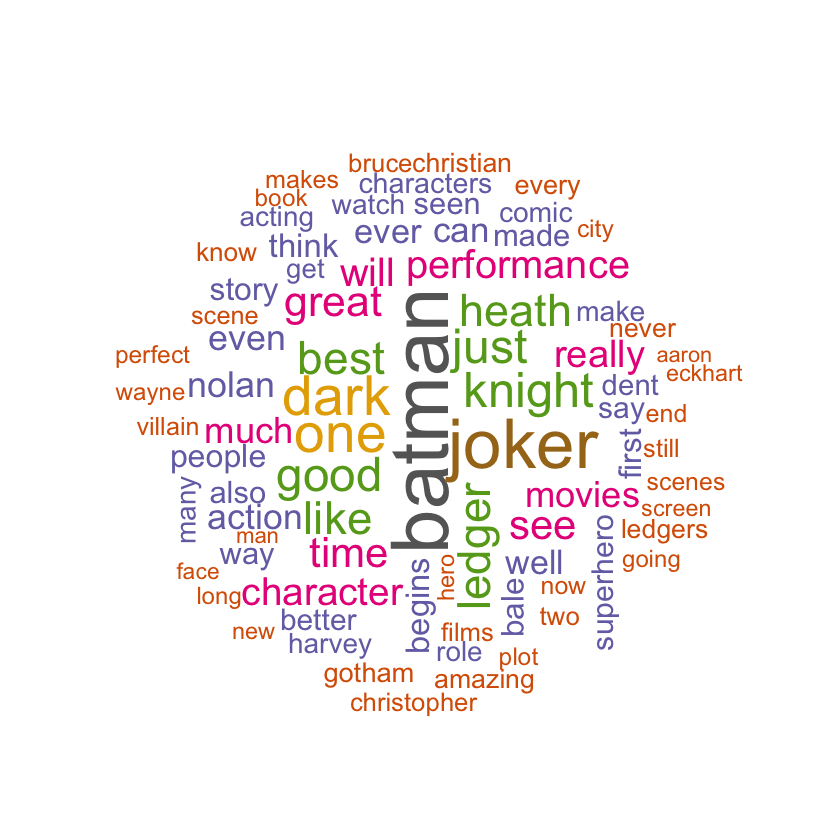

In [24]:
freq = data.frame(sort(colSums(as.matrix(review_dtm_tfidf)), decreasing=TRUE))
wordcloud(rownames(freq), freq[,1], max.words=150, random.order=FALSE, colors=brewer.pal(8, "Dark2"))

In [25]:
freq

,sort.colSums.as.matrix.review_dtm_tfidf....decreasing...TRUE.
batman,6458.069
joker,5448.684
dark,4197.644
one,4164.461
knight,3597.104
just,3522.852
good,3485.368
best,3339.946
ledger,3314.406
like,3308.960


In [11]:
#neg_words = read.table("/Users/yy/Documents/Dongxf/liu/negative-words.txt", header = F, stringsAsFactors = F)[, 1]
#pos_words = read.table("/Users/yy/Documents/Dongxf/liu/positive-words.txt", header = F, stringsAsFactors = F)[, 1]

In [12]:
#text$review = NULL
#text$neg = sapply(docs, tm_term_score, neg_words)
#text$pos = sapply(docs, tm_term_score, pos_words)

In [13]:
dtm <- TermDocumentMatrix(docs)
#dtm <- removeSparseTerms(dtm, 0.09)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d, 10)

,word,freq
batman,batman,13175
joker,joker,9474
dark,dark,6871
one,one,6468
knight,knight,5461
just,just,5070
ledger,ledger,4851
heath,heath,4828
like,like,4756
good,good,4704


In [14]:
dtm

<<TermDocumentMatrix (terms: 19820, documents: 66580)>>
Non-/sparse entries: 358634/1319256966
Sparsity           : 100%
Maximal term length: 40
Weighting          : term frequency (tf)

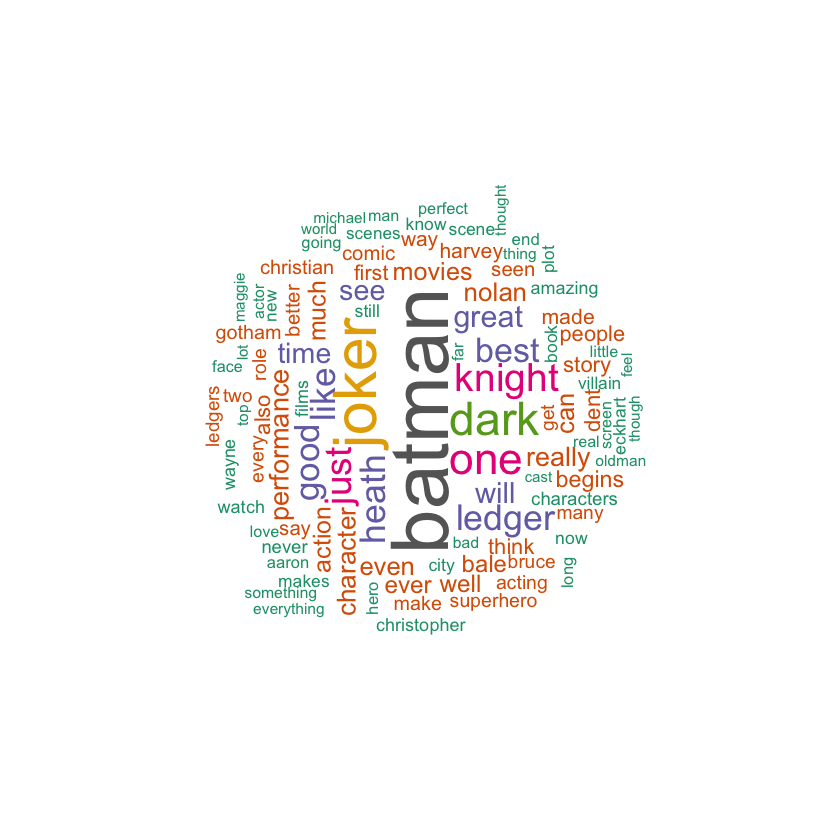

In [15]:
set.seed(1234)
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=100, random.order=FALSE, rot.per=0.35,  
          colors=brewer.pal(8, "Dark2"))

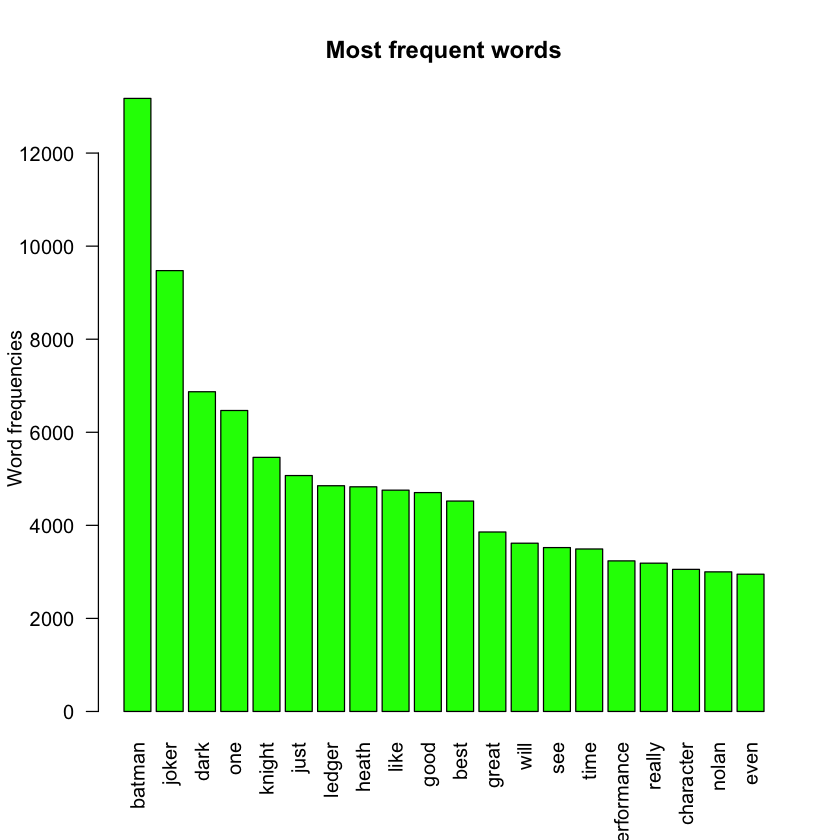

In [20]:
barplot(names.arg = d[1:20,]$word, d[1:20,]$freq, las = 2 ,
        col ="green", main ="Most frequent words",
        ylab = "Word frequencies")